<a href="https://colab.research.google.com/github/joacocresp-dotcom/ProyectoParteIIICrespi/blob/main/proyectods_partel_crespi_1_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1¬∞ Pre Entrega - Visualizacion en Python**
___

Primera Entrega: 22/09/2025

Alumno: Joaquin Crespi

Curso: 77695
___

**Abstract**

En el presente informe se desarrolla un an√°lisis exploratorio y descriptivo del dataset Shoe Prices, extra√≠do de Kaggle, con el prop√≥sito de interpretar su informaci√≥n desde una perspectiva visual y num√©rica. Se busca validar hip√≥tesis preestablecidas, generar datos relevantes y detectar tanto insights (patrones y tendencias) como outsights (aspectos inesperados o menos comunes) que aporten valor en la toma de decisiones estrat√©gicas dentro del mercado de calzado.

La metodolog√≠a empleada incluy√≥ la carga y exploraci√≥n inicial del dataset, verificando la ausencia de valores perdidos para asegurar la calidad de los datos. Se realiz√≥ un an√°lisis de la distribuci√≥n de las principales variables categ√≥ricas, como la cantidad de filas por marca y los tipos de calzado m√°s frecuentes, utilizando tablas y gr√°ficos de conteo. Se profundiz√≥ en la diversidad de la oferta de cada marca analizando el n√∫mero de modelos √∫nicos.

Asimismo, se exploraron las relaciones multivariadas entre variables clave mediante tablas de contingencia y gr√°ficos de barras agrupadas, como la distribuci√≥n de g√©nero por marca y por tipo de calzado, identificando posibles segmentaciones del mercado. La distribuci√≥n de precios fue examinada a trav√©s de un histograma para comprender los rangos de precios m√°s comunes.

Los an√°lisis preliminares han permitido visualizar la concentraci√≥n del mercado en ciertos tipos de calzado (running, casual) y marcas, as√≠ como observar patrones en la distribuci√≥n de modelos por marca y las proporciones de g√©nero dentro de diferentes categor√≠as. Estos hallazgos constituyen una base s√≥lida para la validaci√≥n de las hip√≥tesis planteadas y la identificaci√≥n de √°reas de inter√©s para futuras investigaciones y estrategias comerciales.



**Herramientas:**

A nivel te√≥rico, se aplicar√°n t√©cnicas de an√°lisis univariado, bivariado y multivariado, con el fin de obtener una visi√≥n integral de los datos. Para ello, se utilizar√°n herramientas de manipulaci√≥n y visualizaci√≥n como Pandas, Matplotlib y Seaborn, que facilitan la exploraci√≥n de patrones, tendencias y relaciones entre variables.

**Hip√≥tesis:**

El mercado de calzado representado en este dataset presenta una clara polarizaci√≥n en su estructura de precios, donde los tipos de calzado orientados al rendimiento y a las marcas l√≠deres se posicionan consistentemente en rangos de precio superiores, mientras que los tipos casuales y lifestyle, junto con marcas con menor diversidad de modelos, se concentran en segmentos de precio medio a bajo, lo que sugiere que el valor percibido y la estrategia de marca est√°n fuertemente ligados al uso espec√≠fico y al posicionamiento de la empresa en el mercado.

**Dataframe:**

Se utiliza la libreria kaggle para generar una ruta de acceso a los datos de "shoes price dataset", a un ruta local. En el cual luego podremos hacer otro codigo haciendo referencia a dicha tabla y podremos traer el Dataframe.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

print("Path to dataset files:", path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.23k/9.23k [00:00<00:00, 3.82MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rkiattisak/shoe-prices-dataset/versions/1


In [2]:
import os

# Lista los archivos y directorios dentro de la ruta de descarga
print("Archivos en la ruta de descarga:")
for root, dirs, files in os.walk(path):
    print(f"Directorio: {root}")
    for file in files:
        print(f"  Archivo: {file}")

Archivos en la ruta de descarga:
Directorio: /root/.cache/kagglehub/datasets/rkiattisak/shoe-prices-dataset/versions/1
  Archivo: Shoe prices.csv


In [3]:
import kagglehub
import pandas as pd
import os

# Descargar la √∫ltima versi√≥n
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

print("Path to dataset files:", path)

# Cargar el archivo principal del dataset
# Construir la ruta completa al archivo CSV
# Corregimos el nombre del archivo seg√∫n el listado
file_path = os.path.join(path, "Shoe prices.csv")
df = pd.read_csv(file_path)

# --- Mostrar el total de filas ---
print(f"\nTotal de filas en el DataFrame: {len(df)}")
# --- Fin de la adici√≥n ---

# # Mostrar los nombres de las columnas por separado - ELIMINADO
# print("\nNombres de las columnas:")
# for col in df.columns:
#     print(col)

# --- Enumerar la cantidad de filas por marcas, agregar total y porcentaje ---
print("\nCantidad de filas por marca:")
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Cantidad']

# Calcular porcentaje
total_rows = brand_counts['Cantidad'].sum()
brand_counts['Porcentaje (%)'] = (brand_counts['Cantidad'] / total_rows * 100).map("{:.2f}%".format)

# Agregar fila total
total_row = pd.DataFrame({'Brand': ['Total'], 'Cantidad': [total_rows], 'Porcentaje (%)': ['100.00%']})
brand_counts = pd.concat([brand_counts, total_row], ignore_index=True)

display(brand_counts.style.hide(axis="index"))
# --- Fin de la modificaci√≥n ---


display(df.head())

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
Path to dataset files: /kaggle/input/shoe-prices-dataset

Total de filas en el DataFrame: 1006

Cantidad de filas por marca:


Brand            Model        Type Gender    Size      Color   Material  \
0      Nike     Air Jordan 1  Basketball    Men   US 10  Red/Black    Leather   
1    Adidas   Ultra Boost 21     Running    Men  US 9.5      Black  Primeknit   
2    Reebok  Classic Leather      Casual    Men   US 11      White    Leather   
3  Converse     Chuck Taylor      Casual  Women    US 8       Navy     Canvas   
4      Puma     Future Rider   Lifestyle  Women  US 7.5       Pink       Mesh   

  Price (USD)  
0    $170.00   
1    $180.00   
2     $75.00   
3     $55.00   
4     $80.00




Este conjunto de datos contiene informaci√≥n sobre las ventas de zapatos en una regi√≥n particular que la vamos a denominar Buenos Aires. Los datos incluyen informaci√≥n sobre la marca, el modelo, el tipo de zapato, el g√©nero, la talla, el color, el material y el precio.

Brand (Marca):

 La marca del zapato, como Nike, Adidas o Reebok.

Model (Modelo):

 El nombre o n√∫mero de modelo espec√≠fico del zapato, como Air Jordan 1, Ultra Boost 21 o Classic Leather.

Type (Tipo):

 El tipo de zapato, como de correr (running), casual o de skate. Esta columna describe el uso o funci√≥n previsto del zapato.

Gender (G√©nero):

 El g√©nero para el que est√° dise√±ado el zapato, como hombres (men), mujeres (women) o unisex. Esta columna especifica el p√∫blico objetivo del zapato.

Size (Talla):

 La talla del zapato, utilizando la numeraci√≥n de EE. UU. Esta columna indica la longitud del zapato en pulgadas o cent√≠metros.

Color (Color):

 El color exterior del zapato. Esta columna describe el color predominante o la
combinaci√≥n de colores del zapato.

Material (Material):

 El material principal del zapato, como cuero (leather), malla (mesh) o gamuza (suede). Esta columna indica el material que constituye la mayor parte de la construcci√≥n del zapato.

Price (USD) (Precio en USD):

 El precio del zapato, en d√≥lares estadounidenses. Esta columna especifica el costo de compra del zapato.





In [4]:
# Obtener la lista de marcas √∫nicas
unique_brands = df['Brand'].unique()

print("Lista de marcas √∫nicas:")
for brand in unique_brands:
    print(brand)

Lista de marcas √∫nicas:
Nike
Adidas
Reebok
Converse
Puma
Vans
New Balance
Asics
Fila
Skechers


Es importante podes saber que cuales son los analizados en este trabajo es por eso que generamos un codigo en el cual traemos las marcas que estan presentes.

In [5]:
## Vamos a chequear los Missing Values

missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

Chequeamos de no tener valores nulos dentro de nuestro Dataset

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.


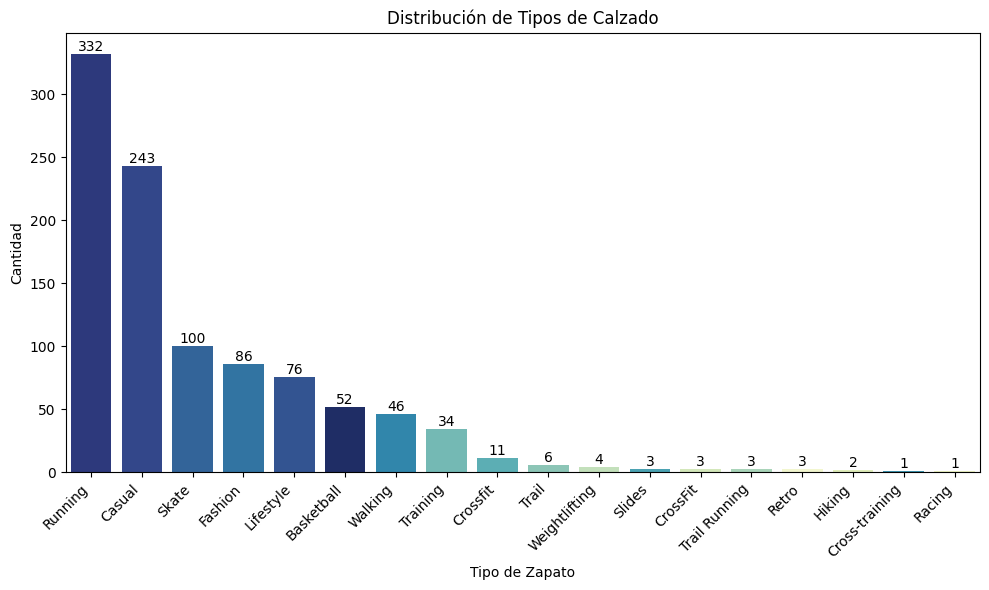

In [6]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
# Este paso puede ser redundante si ya se ejecut√≥ la celda de descarga,
# pero asegura que 'path' est√© definido.
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

# Construir la ruta completa al archivo CSV (usando el nombre correcto)
file_path = os.path.join(path, "Shoe prices.csv")

# Cargar el DataFrame si a√∫n no est√° definido
if 'df' not in locals() and 'df' not in globals():
    df = pd.read_csv(file_path)

# Ahora que 'df' est√° definido, podemos usarlo para el gr√°fico
order = df['Type'].value_counts().index
plt.figure(figsize=(10, 6)) # Opcional: ajusta el tama√±o del gr√°fico
# Usar la paleta 'YlGnBu' INVERTIDA y guardar los ejes para a√±adir etiquetas
# Seguir sugerencia de Future warning: usar hue=df['Type'] y legend=False
ax = sns.countplot(x='Type', data=df, order=order, palette="YlGnBu_r", hue=df['Type'], legend=False) # CAMBIAR paleta a 'YlGnBu_r' (invertida) y a√±adir hue/legend

plt.title('Distribuci√≥n de Tipos de Calzado') # Puedes ajustar el t√≠tulo si es necesario
plt.xlabel('Tipo de Zapato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x si son largas

# Agregar etiquetas de datos a las barras
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout() # Ajusta el dise√±o para evitar que las etiquetas se corten
plt.show()

El gr√°fico muestra que los tipos de zapatos m√°s frecuentes corresponden a categor√≠as como running y casual, mientras que otros, como skate o formal, tienen menor representaci√≥n. Esto sugiere que el mercado analizado se orienta principalmente hacia calzado deportivo y de uso cotidiano, lo cual puede estar alineado con las preferencias de consumo actuales. Este hallazgo preliminar es relevante para nuestra hip√≥tesis sobre, al confirmar la predominancia de los segmentos Running y Casual en la oferta.

In [7]:
import pandas as pd

# Crear el dataframe original
data = {
    "Type": ["Running","Casual","Skate","Fashion","Lifestyle","Basketball","Walking",
             "Training","Crossfit","Trail","Weightlifting","Slides","CrossFit",
             "Trail Running","Retro","Hiking","Cross-training","Racing"],
    "Cantidad": [332,243,100,86,76,52,46,34,11,6,4,3,3,3,3,2,1,1],
    "Porcentaje": [33.00,24.16,9.94,8.55,7.55,5.17,4.57,3.38,1.09,0.60,
                   0.40,0.30,0.30,0.30,0.30,0.20,0.10,0.10]
}

df_types = pd.DataFrame(data)

# Funci√≥n de segmentaci√≥n
def segmentar(p):
    if p >= 10:
        return "Alta"
    elif p >= 4:
        return "Media"
    else:
        return "Baja"

# Crear columna de segmentaci√≥n
df_types["Categoria"] = df_types["Porcentaje"].apply(segmentar)

# Formatear la columna porcentaje con el s√≠mbolo %
df_types["Porcentaje (%)"] = df_types["Porcentaje"].map("{:.2f}%".format)

# Reordenar columnas para la tabla final
df_types = df_types[["Type","Cantidad","Porcentaje (%)","Categoria"]]

# ---- Tabla 1: segmentada por tipo de zapato ----
print("üìä Distribuci√≥n de Tipos de Zapatos (Cantidad, Porcentaje y Categor√≠a):")
display(df_types)

# ---- Tabla 2: resumen por categor√≠a ----
resumen = (
    df_types.groupby("Categoria")["Cantidad"]
    .sum()
    .reset_index()
    .sort_values(by="Cantidad", ascending=False)
)

# Calcular porcentaje sobre el total
total = resumen["Cantidad"].sum()
resumen["Porcentaje (%)"] = (resumen["Cantidad"] / total * 100).map("{:.2f}%".format)

print("\nüìå Resumen por Categor√≠a (ordenado de mayor a menor):")
display(resumen)


üìä Distribuci√≥n de Tipos de Zapatos (Cantidad, Porcentaje y Categor√≠a):


Type  Cantidad Porcentaje (%) Categoria
0          Running       332         33.00%      Alta
1           Casual       243         24.16%      Alta
2            Skate       100          9.94%     Media
3          Fashion        86          8.55%     Media
4        Lifestyle        76          7.55%     Media
5       Basketball        52          5.17%     Media
6          Walking        46          4.57%     Media
7         Training        34          3.38%      Baja
8         Crossfit        11          1.09%      Baja
9            Trail         6          0.60%      Baja
10   Weightlifting         4          0.40%      Baja
11          Slides         3          0.30%      Baja
12        CrossFit         3          0.30%      Baja
13   Trail Running         3          0.30%      Baja
14           Retro         3          0.30%      Baja
15          Hiking         2          0.20%      Baja
16  Cross-training         1          0.10%      Baja
17          Racing         1          0.10%      Baja


üìå Resumen por Categor√≠a (ordenado de mayor a menor):


Categoria  Cantidad Porcentaje (%)
0      Alta       575         57.16%
2     Media       360         35.79%
1      Baja        71          7.06%

Del an√°lisis realizado se observa que el mercado presenta una clara concentraci√≥n en las categor√≠as de mayor participaci√≥n, donde los segmentos Running y Casual re√∫nen m√°s de la mitad de la demanda total (57,16%). Esto refleja la preferencia de los consumidores por productos asociados tanto al rendimiento deportivo como al uso cotidiano, consolidando a estas tipolog√≠as como pilares fundamentales del mercado.

En segundo lugar, las categor√≠as de participaci√≥n media alcanzan un 35,79%, lo que evidencia la existencia de un grupo significativo de consumidores que priorizan aspectos vinculados a la moda, el estilo de vida o deportes espec√≠ficos como el skate y el b√°squet. Este segmento intermedio constituye un espacio estrat√©gico para la diferenciaci√≥n y la construcci√≥n de identidad de marca.

Por √∫ltimo, las categor√≠as de menor peso representan apenas el 7,06% del total, lo que indica que los nichos especializados (como trail, crossfit o weightlifting) tienen una incidencia reducida. No obstante, estos pueden ofrecer oportunidades de posicionamiento en mercados selectos y de fidelizaci√≥n de consumidores con intereses muy espec√≠ficos.

En conclusi√≥n, el mercado se encuentra polarizado: altamente concentrado en dos segmentos dominantes, complementado por un grupo intermedio relevante y un conjunto reducido de nichos especializados. Este escenario sugiere que las marcas que busquen competitividad deber√°n asegurar una fuerte presencia en Running y Casual, al tiempo que aprovechan el potencial de diferenciaci√≥n que ofrecen las categor√≠as de participaci√≥n media.

In [8]:
# Agrupar por 'Brand' y contar los modelos √∫nicos
models_per_brand = df.groupby('Brand')['Model'].nunique().reset_index()
models_per_brand.columns = ['Brand', 'Numero de Modelos']

# Calcular el porcentaje de modelos de cada marca sobre el total de modelos √∫nicos
total_unique_models = models_per_brand['Numero de Modelos'].sum()
models_per_brand['Porcentaje'] = (models_per_brand['Numero de Modelos'] / total_unique_models) * 100 # Calcular el porcentaje como n√∫mero para la segmentaci√≥n

# Funci√≥n de segmentaci√≥n (la misma que antes)
def segmentar(p):
    if p >= 10:
        return "Alta"
    elif p >= 4:
        return "Media"
    else:
        return "Baja"

# Crear columna de segmentaci√≥n
models_per_brand["Categoria"] = models_per_brand["Porcentaje"].apply(segmentar)

# Formatear la columna porcentaje con el s√≠mbolo % para la visualizaci√≥n final
models_per_brand["Porcentaje (%)"] = models_per_brand["Porcentaje"].map("{:.2f}%".format)


# Ordenar por la cantidad de modelos descendente para ver las marcas con m√°s modelos primero
models_per_brand = models_per_brand.sort_values(by='Numero de Modelos', ascending=False)

print("üìä Cantidad y Porcentaje de Modelos √önicos por Marca:")
# Mostrar el DataFrame sin el √≠ndice
display(models_per_brand[['Brand', 'Numero de Modelos', 'Porcentaje (%)', 'Categoria']].style.hide(axis="index"))

# ---- Tabla 2: resumen por categor√≠a (basado en la distribuci√≥n de modelos por marca) ----
resumen_modelos_marca = (
    models_per_brand.groupby("Categoria")["Numero de Modelos"]
    .sum()
    .reset_index()
    .sort_values(by="Numero de Modelos", ascending=False)
)

# Calcular porcentaje sobre el total de modelos √∫nicos
total_resumen_modelos_marca = resumen_modelos_marca["Numero de Modelos"].sum()
resumen_modelos_marca["Porcentaje (%)"] = (resumen_modelos_marca["Numero de Modelos"] / total_resumen_modelos_marca * 100).map("{:.2f}%".format)

print("\nüìå Resumen por Categor√≠a de Modelos por Marca (ordenado de mayor a menor):")
display(resumen_modelos_marca.style.hide(axis="index"))

üìä Cantidad y Porcentaje de Modelos √önicos por Marca:



üìå Resumen por Categor√≠a de Modelos por Marca (ordenado de mayor a menor):


El an√°lisis de modelos √∫nicos por marca muestra que la mayor√≠a de las empresas se concentran en la categor√≠a Alta (71,97%), apostando por un portafolio amplio y diversificado. En cambio, marcas como Fila, Adidas y Converse, dentro de la categor√≠a Media (25,10%), optan por una estrategia m√°s acotada, enfocada en ciertos segmentos del mercado. Finalmente, Vans representa la categor√≠a Baja (2,93%), con un portafolio reducido y claramente dirigido a un nicho espec√≠fico. Esto evidencia que, mientras algunas marcas buscan abarcar m√∫ltiples categor√≠as, otras prefieren consolidarse en un nicho bien definido.

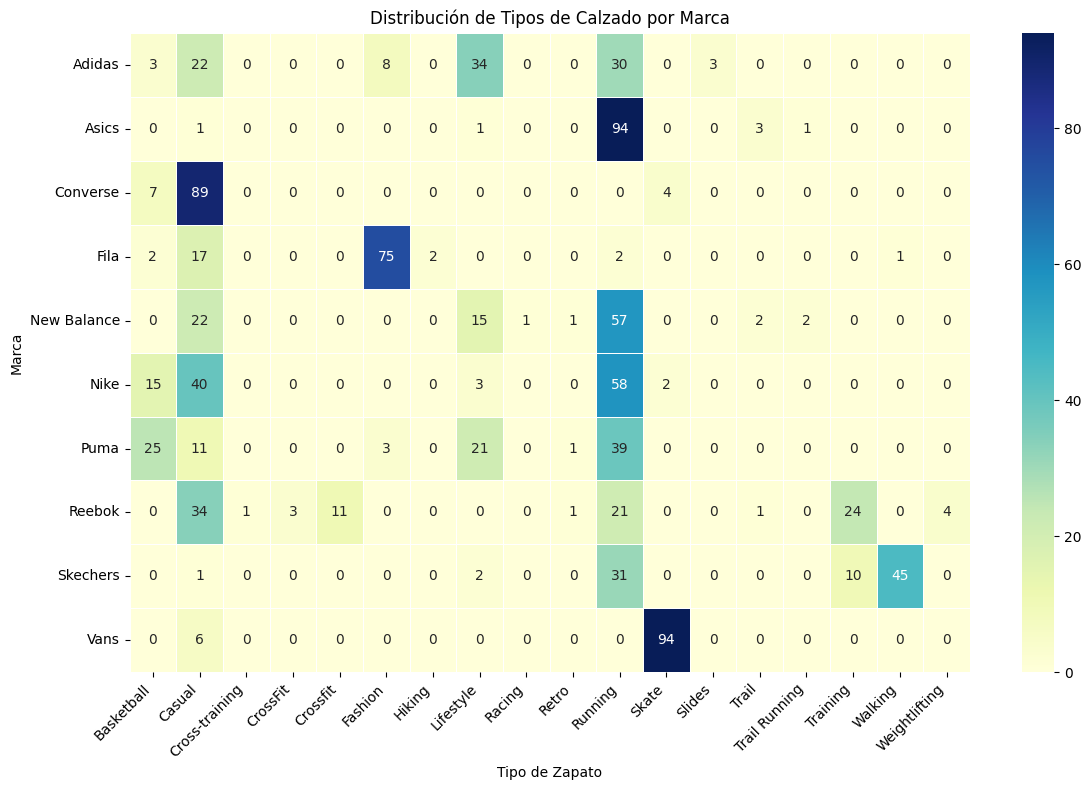

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de cada tipo de zapato por marca
brand_type_counts = df.groupby(['Brand', 'Type']).size().unstack(fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(12, 8)) # Ajusta el tama√±o seg√∫n necesites
sns.heatmap(brand_type_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title('Distribuci√≥n de Tipos de Calzado por Marca')
plt.xlabel('Tipo de Zapato')
plt.ylabel('Marca')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

El an√°lisis de modelos √∫nicos por marca muestra que la mayor√≠a de las empresas se concentran en la categor√≠a Alta (71,97%), apostando por un portafolio amplio y diversificado. En cambio, marcas como Fila, Adidas y Converse, dentro de la categor√≠a Media (25,10%), optan por una estrategia m√°s acotada, enfocada en ciertos segmentos del mercado. Finalmente, Vans representa la categor√≠a Baja (2,93%), con un portafolio reducido y claramente dirigido a un nicho espec√≠fico. Esto evidencia que, mientras algunas marcas buscan abarcar m√∫ltiples categor√≠as, otras prefieren consolidarse en un nicho bien definido. Este hallazgo sobre las distintas estrategias de portafolio por marca es relevante para nuestra hip√≥tesis, ya que valida que las marcas adoptan enfoques diferenciados en cuanto a la diversidad de su oferta.

üìä Tabla de Contingencia: Brand vs Gender


Gender       Men  Women
Brand                  
Adidas        29     71
Asics         41     59
Converse      39     61
Fila          59     40
New Balance   58     42
Nike          88     30
Puma          69     31
Reebok        75     25
Skechers      36     53
Vans          41     59

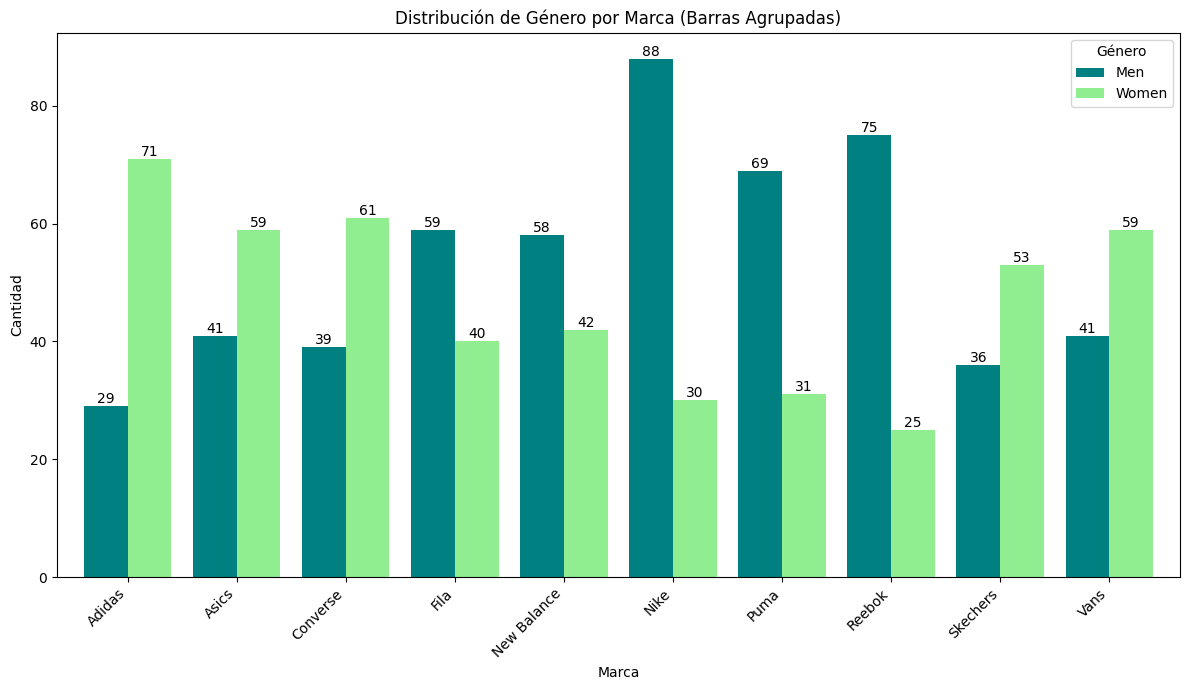

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import numpy as np

# Asegurar que el DataFrame df est√© cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Considerar agregar un exit() o return si la carga es cr√≠tica
    # Para este caso, asumiremos que si falla la carga, el siguiente c√≥digo fallar√° de todos modos

# Limpiar la columna 'Price (USD)' y convertirla a num√©rica (necesario si vamos a usar precio en alg√∫n an√°lisis posterior o si la limpieza no se hizo globalmente)
# Aunque este c√≥digo no usa precio, es buena pr√°ctica si se usa el mismo df
# df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex= embalar.Errors='coerce')


# --- Tabla de Contingencia y Gr√°fico: Brand vs Gender ---

# Crear la tabla de contingencia
brand_gender_crosstab = pd.crosstab(df['Brand'], df['Gender'])

print("üìä Tabla de Contingencia: Brand vs Gender")
display(brand_gender_crosstab)

# # Crear el gr√°fico de barras apiladas - ELIMINADO
# brand_gender_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

# plt.title('Distribuci√≥n de G√©nero por Marca')
# plt.xlabel('Marca')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='G√©nero')
# plt.tight_layout()
# plt.show()

# Gr√°fico de barras agrupadas para comparar mejor las cantidades por g√©nero dentro de cada marca
fig, ax = plt.subplots(figsize=(12, 7)) # Crear figura y ejes expl√≠citamente
# Usar colores personalizados para 'Men' y 'Women'
colors = {'Men': 'teal', 'Women': 'lightgreen'} # Cambiado a verde suave para Women

brand_gender_crosstab.plot(kind='bar', stacked=False, ax=ax, width=0.8, color=[colors[col] for col in brand_gender_crosstab.columns]) # Usar colores personalizados

plt.title('Distribuci√≥n de G√©nero por Marca (Barras Agrupadas)')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='G√©nero')

# Agregar: Cuadr√≠cula al gr√°fico - ELIMINADO
# y_max = brand_gender_crosstab.values.max()
# plt.yticks(np.arange(0, y_max + 10, 10))
# plt.grid(axis='y', linestyle='-', alpha=0.5, which='major')

# Agregar: Etiquetas de datos a las barras
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

La Distribuci√≥n de G√©nero por Marca revela que, si bien algunas marcas como New Balance muestran una oferta relativamente balanceada entre calzado para hombres y mujeres, otras como Nike tienen una clara predominancia de productos orientados a hombres, mientras que Adidas se inclinan m√°s hacia el p√∫blico femenino. Este patr√≥n sugiere diferentes enfoques de segmentaci√≥n de mercado por parte de las marcas.

üìä Tabla de Contingencia: Type vs Gender


Gender          Men  Women
Type                      
Basketball       39     13
Casual          135    108
Cross-training    1      0
CrossFit          3      0
Crossfit          9      2
Fashion          47     39
Hiking            0      2
Lifestyle        29     47
Racing            1      0
Retro             2      1
Running         173    159
Skate            41     59
Slides            0      3
Trail             3      3
Trail Running     2      1
Training         26      8
Walking          20     26
Weightlifting     4      0

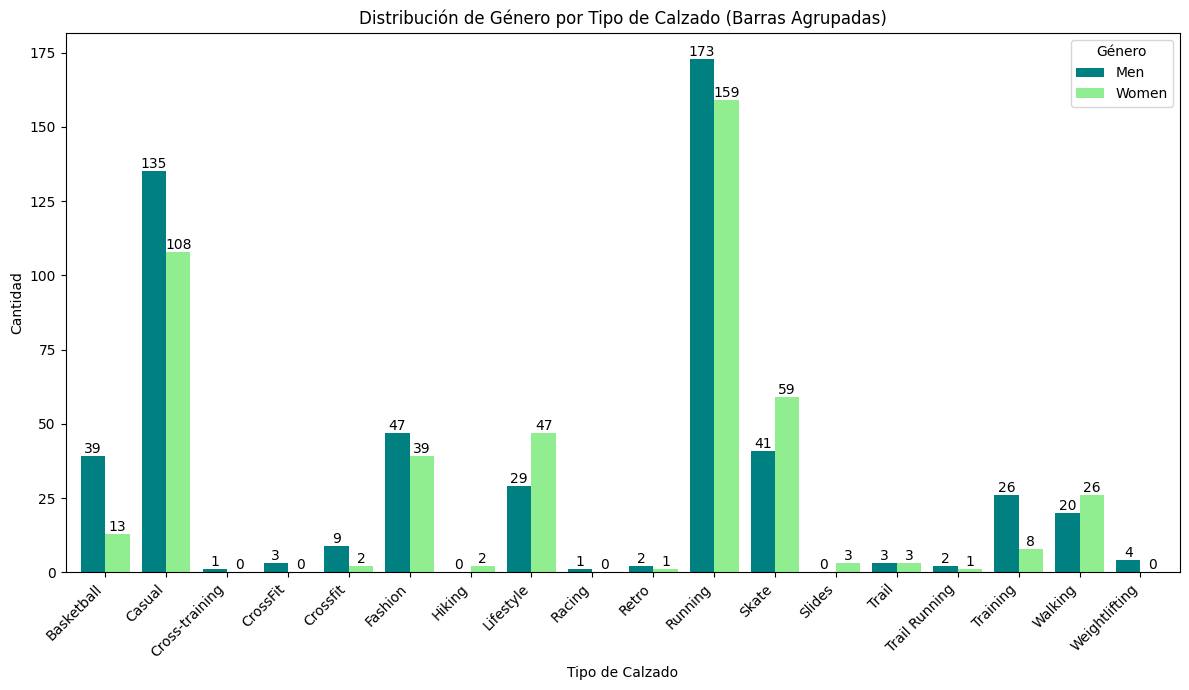

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Asegurar que el DataFrame df est√© cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Considerar agregar un exit() o return si la carga es cr√≠tica

# Limpiar la columna 'Price (USD)' y convertirla a num√©rica (necesario si vamos a usar precio en alg√∫n an√°lisis posterior o si la limpieza no se hizo globalmente)
# Aunque este c√≥digo no usa precio, es buena pr√°ctica si se usa el mismo df
# df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
# df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce')


# --- Tabla de Contingencia y Gr√°fico: Type vs Gender ---

# Crear la tabla de contingencia
type_gender_crosstab = pd.crosstab(df['Type'], df['Gender'])

print("üìä Tabla de Contingencia: Type vs Gender")
display(type_gender_crosstab)

# # Crear el gr√°fico de barras apiladas - ELIMINADO
# type_gender_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='YlGnBu') # CAMBIAR colormap a 'YlGnBu'

# plt.title('Distribuci√≥n de G√©nero por Tipo de Calzado')
# plt.xlabel('Tipo de Calzado')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='G√©nero')
# plt.tight_layout()
# plt.show()

# Opcional: Gr√°fico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 7)) # Crear figura y ejes expl√≠citamente
# Usar los mismos colores personalizados que en el gr√°fico de Marca vs G√©nero
colors = {'Men': 'teal', 'Women': 'lightgreen'}

type_gender_crosstab.plot(kind='bar', stacked=False, ax=ax, width=0.8, color=[colors[col] for col in type_gender_crosstab.columns]) # CAMBIAR colormap a 'YlGnBu', usar colores personalizados

plt.title('Distribuci√≥n de G√©nero por Tipo de Calzado (Barras Agrupadas)')
plt.xlabel('Tipo de Calzado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='G√©nero')

# --- Agregar: Etiquetas de datos a las barras ---
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%d', label_type='edge')
# --- Fin de la adici√≥n ---

plt.tight_layout()
plt.show()

De manera similar, la **Distribuci√≥n de G√©nero por Tipo de Calzado** evidencia que ciertos tipos, como Basketball y Training, est√°n mayormente dirigidos a hombres, mientras que otros, como Lifestyle, Walking y Slides, tienen una mayor representaci√≥n en la oferta para mujeres. Tipos como Casual y Running muestran una distribuci√≥n de g√©nero m√°s pareja. Estos hallazgos son cruciales para entender las preferencias de g√©nero dentro de nichos de mercado espec√≠ficos y guiar estrategias de desarrollo de producto y marketing. Esta segmentaci√≥n por g√©nero dentro de los tipos de calzado valida aspectos de nuestra hip√≥tesis sobre la segmentaci√≥n del mercado por tipo y g√©nero, y es relevante para la identificaci√≥n de potenciales nichos desatendidos.

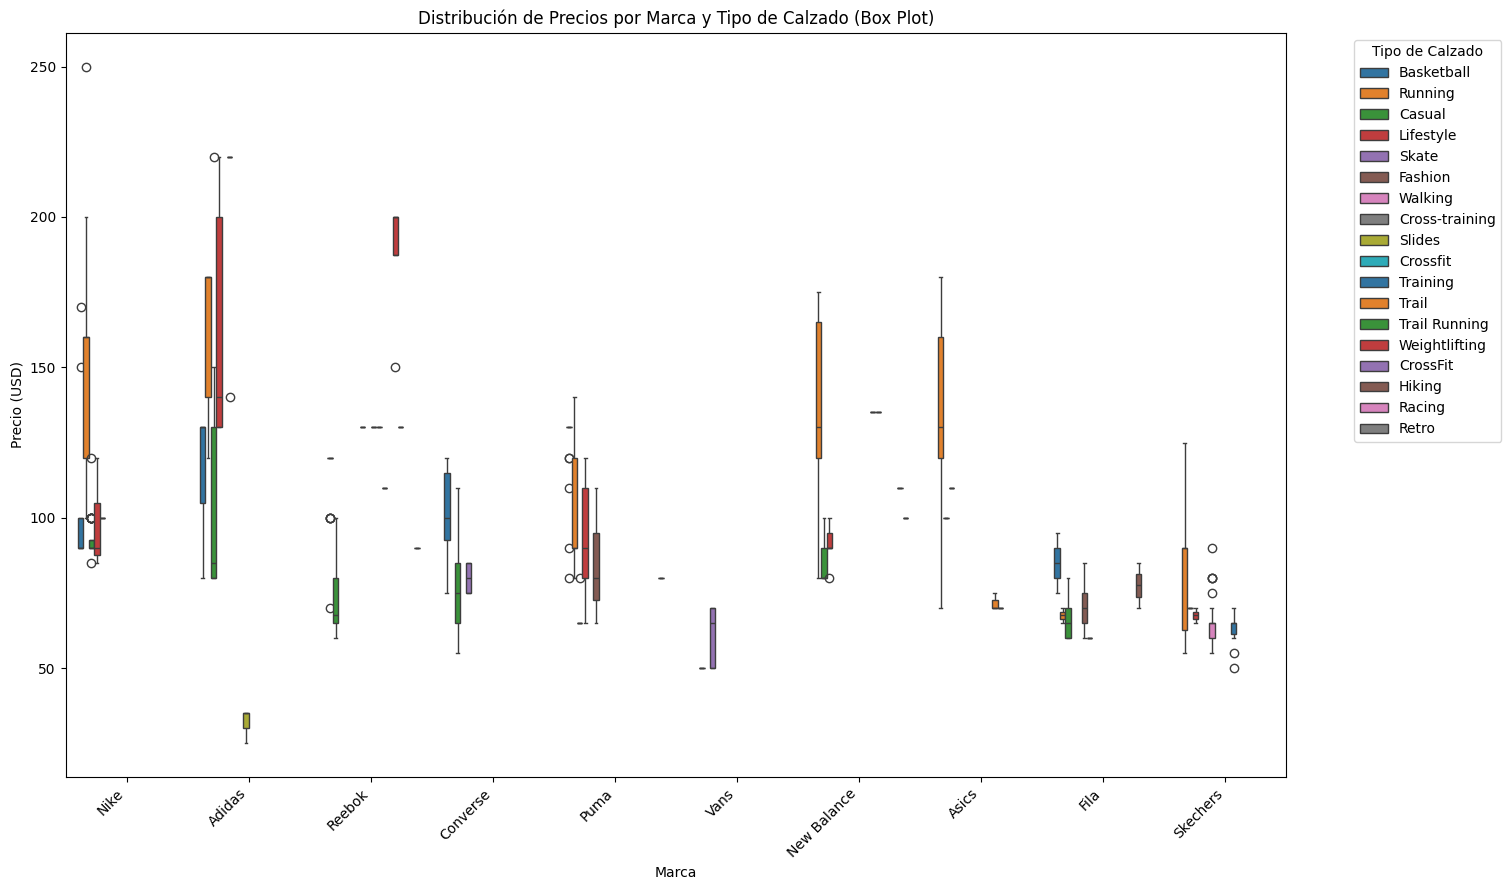

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

# Asegurar que el DataFrame df est√© cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path) # Corregido: usar file_path
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Si la carga falla, es mejor detenerse aqu√≠.
    exit()


# Limpiar la columna 'Price (USD)' y convertirla a num√©rica
# Eliminar el s√≠mbolo '$' y las comas, luego convertir a float
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversi√≥n
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()

# --- Box Plot: Precio por Marca, diferenciado por Tipo ---
plt.figure(figsize=(18, 9)) # Ajusta el tama√±o para mejor visualizaci√≥n

# seaborn.boxplot con hue='Type', usando paleta cualitativa
sns.boxplot(data=df_cleaned_price, x='Brand', y='Price (USD)', hue='Type', palette='tab10') # CAMBIAR paleta a 'tab10' u otra cualitativa

plt.title('Distribuci√≥n de Precios por Marca y Tipo de Calzado (Box Plot)')
plt.xlabel('Marca')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x si son largas
plt.legend(title='Tipo de Calzado', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gr√°fico
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta el dise√±o para dar espacio a la leyenda
plt.show()

Para obtener una comprensi√≥n m√°s profunda de las interacciones en el mercado de calzado, se realizaron an√°lisis multivariados explorando las relaciones entre Marca, Tipo, G√©nero y Precio.

El **Box Plot de Distribuci√≥n de Precios por Marca y Tipo de Calzado** complementa nuestro an√°lisis al visualizar c√≥mo el precio var√≠a en funci√≥n de la marca y el tipo de zapato. Se observa que Marcas como Nike y Adidas presentan rangos de precios significativamente m√°s altos para tipos deportivos como Running o Basketball en comparaci√≥n con otras marcas o tipos casuales. Asimismo, dentro de una misma marca, la distribuci√≥n de precios difiere notablemente entre tipos; por ejemplo, los modelos de Running tienden a tener una mediana de precio mayor que los modelos Casual para la mayor√≠a de las marcas con oferta en ambos tipos. La presencia de valores at√≠picos en ciertas combinaciones de marca y tipo sugiere la existencia de productos de gama muy alta o variaciones significativas en el precio dentro de nichos espec√≠ficos.

Este an√°lisis visual del precio por segmentaci√≥n de producto es fundamental para entender la estructura de valor en el mercado.

Estos an√°lisis multivariados en conjunto confirman la complejidad del mercado, donde las estrategias de marca, la segmentaci√≥n por tipo y g√©nero, y el posicionamiento de precios interact√∫an para definir la oferta de productos y apuntar a segmentos de mercado espec√≠ficos.

Estos hallazgos en el Box Plot de precios son cruciales para validar nuestra hip√≥tesis principal sobre la polarizaci√≥n en la estructura de precios del mercado y c√≥mo el valor percibido est√° fuertemente ligado al uso espec√≠fico y al posicionamiento de la marca.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Tabla de Contingencia: Brand vs Type ---

# Crear la tabla de contingencia
# Ya visualizamos esto con el heatmap, esta tabla da los n√∫meros exactos
brand_type_crosstab = pd.crosstab(df['Brand'], df['Type'])

print("üìä Tabla de Contingencia: Brand vs Type")
display(brand_type_crosstab)

# Nota: Graficar esto con barras (apiladas o agrupadas) puede ser muy denso
# debido a la cantidad de tipos. El heatmap (celda 720e0725) es generalmente
# una mejor visualizaci√≥n para esta combinaci√≥n.
# Si a√∫n deseas el gr√°fico de barras, puedes descomentar el siguiente c√≥digo:

# brand_type_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
# plt.title('Distribuci√≥n de Tipos de Calzado por Marca')
# plt.xlabel('Marca')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Tipo de Calzado', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout(rect=[0, 0, 0.85, 1])
# plt.show()

üìä Tabla de Contingencia: Brand vs Type


Type         Basketball  Casual  Cross-training  CrossFit  Crossfit  Fashion  \
Brand                                                                          
Adidas                3      22               0         0         0        8   
Asics                 0       1               0         0         0        0   
Converse              7      89               0         0         0        0   
Fila                  2      17               0         0         0       75   
New Balance           0      22               0         0         0        0   
Nike                 15      40               0         0         0        0   
Puma                 25      11               0         0         0        3   
Reebok                0      34               1         3        11        0   
Skechers              0       1               0         0         0        0   
Vans                  0       6               0         0         0        0   

Type         Hiking  Lifestyle  Racing  Retro  Running  Skate  Slides  Trail  \
Brand                                                                          
Adidas            0         34       0      0       30      0       3      0   
Asics             0          1       0      0       94      0       0      3   
Converse          0          0       0      0        0      4       0      0   
Fila              2          0       0      0        2      0       0      0   
New Balance       0         15       1      1       57      0       0      2   
Nike              0          3       0      0       58      2       0      0   
Puma              0         21       0      1       39      0       0      0   
Reebok            0          0       0      1       21      0       0      1   
Skechers          0          2       0      0       31      0       0      0   
Vans              0          0       0      0        0     94       0      0   

Type         Trail Running  Training  Walking  Weightlifting  
Brand                                                         
Adidas                   0         0        0              0  
Asics                    1         0        0              0  
Converse                 0         0        0              0  
Fila                     0         0        1              0  
New Balance              2         0        0              0  
Nike                     0         0        0              0  
Puma                     0         0        0              0  
Reebok                   0        24        0              4  
Skechers                 0        10       45              0  
Vans                     0         0        0              0

La tabla de contingencia de Marca vs. Tipo  nos indica qu√© marcas ofrecen qu√© tipos de calzado y en qu√© cantidades. Vemos que algunas marcas se especializan ej: Converse en Casual, Vans en Skate, Asics en Running/Trail, mientras que otras tienen una oferta m√°s diversificada ej: Nike, Adidas, Puma, New Balance, Reebok.

Este an√°lisis es relevante para nuestra hip√≥tesis sobre las diferentes estrategias de marca en cuanto a la diversidad de su oferta y la potencial identificaci√≥n de nichos basados en la especializaci√≥n por tipo de calzado.

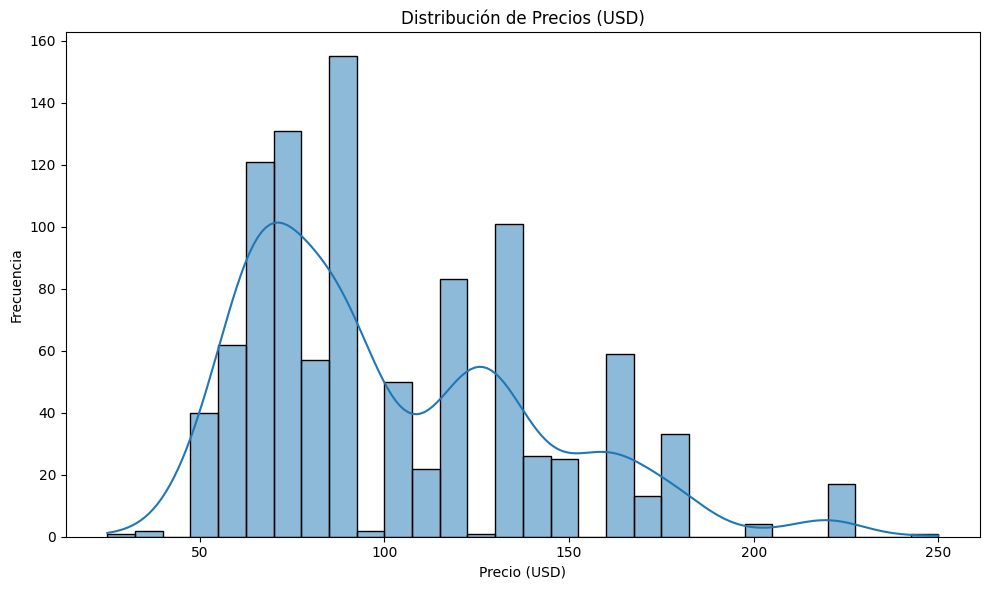

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Limpiar la columna 'Price (USD)' y convertirla a num√©rica
# Eliminar el s√≠mbolo '$' y las comas, luego convertir a float
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversi√≥n
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()


# Crear el histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned_price, x='Price (USD)', bins=30, kde=True) # bins ajusta el n√∫mero de barras, kde agrega una l√≠nea de densidad

plt.title('Distribuci√≥n de Precios (USD)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

El histograma de distribuci√≥n de precios muestra que la mayor parte de los productos se concentran en el rango de 50 a 120 USD, con picos marcados entre 70 y 100 USD, lo que refleja que el mercado se orienta principalmente a una oferta de gama media-baja. La forma de la distribuci√≥n evidencia un sesgo hacia la derecha, ya que existen menos productos en rangos de precios m√°s altos (150 a 250 USD). Sin embargo, la presencia de modelos en este extremo superior sugiere que algunas marcas ofrecen productos premium o ediciones especiales que buscan captar un segmento exclusivo, aunque en vol√∫menes menores.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

# Asegurar que el DataFrame df est√© cargado
try:
    if 'df' not in locals() and 'df' in globals(): # Corregido: 'df' in globals() para chequear si ya existe globalmente
        pass # df ya est√° cargado
    else:
        # Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Si la carga falla, es mejor detenerse aqu√≠.
    exit()


# Limpiar la columna 'Price (USD)' y convertirla a num√©rica
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversi√≥n
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()

# --- Calcular el precio promedio por Tipo de Calzado ---
# Corregido: quitar el corchete ']' del nombre de la columna
average_price_by_type = df_cleaned_price.groupby('Type')['Price (USD)'].mean().reset_index()
average_price_by_type.columns = ['Type', 'Precio Promedio (USD)']

# Ordenar por precio promedio descendente para mejor visualizaci√≥n
average_price_by_type = average_price_by_type.sort_values(by='Precio Promedio (USD)', ascending=False)

# --- Formatear la columna de Precio Promedio con signo de d√≥lar y 2 decimales ---
average_price_by_type['Precio Promedio (USD) fmt'] = average_price_by_type['Precio Promedio (USD)'].map('${:.2f}'.format)
# --- Fin de la modificaci√≥n ---

print("üìä Precio Promedio por Tipo de Calzado:")
display(average_price_by_type[['Type', 'Precio Promedio (USD) fmt']]) # Mostrar la columna formateada

# --- Crear un gr√°fico de barras del precio promedio por Tipo ---
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=average_price_by_type,
    x='Type',
    y='Precio Promedio (USD)',
    hue='Type',                # Se agrega hue para compatibilidad futura
    palette='YlGnBu',
    legend=False               # Evita mostrar la leyenda duplicada
)

plt.title('Precio Promedio por Tipo de Calzado')
plt.xlabel('Tipo de Calzado')
plt.ylabel('Precio Promedio (USD)')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x

# --- Asegurar que el eje Y comience en 0 ---
plt.ylim(0, average_price_by_type['Precio Promedio (USD)'].max() * 1.1) # Establecer el l√≠mite inferior en 0 y un poco por encima del m√°ximo
# --- Fin de la adici√≥n ---

plt.tight_layout()
plt.show()


Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
üìä Precio Promedio por Tipo de Calzado:


Type Precio Promedio (USD) fmt
17   Weightlifting                   $187.50
2   Cross-training                   $130.00
4         Crossfit                   $130.00
3         CrossFit                   $130.00
10         Running                   $129.08
7        Lifestyle                   $122.83
14   Trail Running                   $113.33
0       Basketball                   $112.69
15        Training                   $110.29
8           Racing                   $110.00
13           Trail                    $99.17
9            Retro                    $90.00
5          Fashion                    $83.90
1           Casual                    $79.94
6           Hiking                    $77.50
16         Walking                    $64.98
11           Skate                    $62.20
12          Slides                    $31.67

Al observar los precios promedio por tipo de calzado, se confirma una segmentaci√≥n clara en funci√≥n del uso. Los tipos relacionados con alto rendimiento, como Weightlifting, Cross-training, Crossfit y Running, presentan precios promedio m√°s elevados, posicion√°ndose como categor√≠as premium dentro del mercado. En contraste, los tipos de uso cotidiano o recreativo, como Casual, Fashion, Hiking, Walking y Skate, se encuentran en valores m√°s bajos, generalmente entre 60 y 90 USD, reflejando su enfoque en la masividad y accesibilidad. Los Slides, con un precio promedio de 31.67 USD, representan la categor√≠a m√°s econ√≥mica y dirigida al consumo b√°sico.

El gr√°fico de barras de precio promedio por tipo refuerza esta tendencia, mostrando visualmente c√≥mo los calzados especializados en alto rendimiento se ubican consistentemente en la parte superior del espectro de precios, mientras que los productos casuales y lifestyle se concentran en el rango inferior. Esto indica que las marcas adoptan una doble estrategia: por un lado, captar grandes vol√∫menes de consumidores mediante productos accesibles y de uso diario, y por otro, posicionar l√≠neas de alto rendimiento con precios m√°s altos que apuntan a nichos espec√≠ficos y generan una percepci√≥n de exclusividad y valor agregado.

Este an√°lisis del precio promedio por tipo es fundamental para validar nuestra hip√≥tesis sobre la polarizaci√≥n de la estructura de precios basada en el tipo de calzado y el valor percibido asociado a su uso espec√≠fico.

**Conclusi√≥n**:

El an√°lisis exploratorio y descriptivo del dataset "Shoe Prices" revela que el mercado de calzado se caracteriza por una clara segmentaci√≥n y polarizaci√≥n, influenciada por factores como el tipo de calzado, la marca y el precio.

El mercado est√° fuertemente concentrado en tipos de calzado de uso masivo y deportivo como Running y Casual, aunque existen numerosos nichos especializados con menor volumen de oferta.

Las marcas presentan estrategias diversas, desde aquellas con un amplio portafolio de modelos que buscan abarcar m√∫ltiples segmentos, hasta otras que se especializan en nichos espec√≠ficos con una oferta m√°s acotada.

La distribuci√≥n por g√©nero var√≠a significativamente seg√∫n la marca y el tipo de calzado, indicando una segmentaci√≥n clara del p√∫blico objetivo en ciertas categor√≠as.

La estructura de precios muestra una polarizaci√≥n notoria: los tipos de calzado asociados al alto rendimiento (como Weightlifting, Cross-training, Running) y los productos de marcas l√≠deres tienden a ubicarse en rangos de precio superiores, mientras que los tipos casuales y lifestyle se concentran en segmentos de precio medio a bajo.

En conjunto, los an√°lisis num√©ricos y visuales confirman que el valor percibido y el posicionamiento estrat√©gico en este mercado est√°n estrechamente ligados al uso espec√≠fico del calzado (deportivo vs. casual), la diversidad y el enfoque del portafolio de la marca, y la segmentaci√≥n por g√©nero. Esto sugiere que las oportunidades y la din√°mica competitiva var√≠an significativamente entre los distintos segmentos del mercado de calzado.